In [1]:
import re

file = open('C:/Users/Admin/Desktop/Analiza i Bazy Danych/Lab 1 - tidy data/Datasets/weather.txt')
data = file.read()
file.close()

data = re.sub('[BDS]?[\t ]+(OI|OS|SI|I+|S+)[\t ]*',',',data)
data = re.sub('[\t ]+',',',data)
data = re.sub('\s*,[\t ]*\n','\n',data)
data = re.sub('MX000017004(\d\d\d\d)(\d\d)(\w\w\w\w)','\g<1>-\g<2>,\g<3>',data)
data = data.replace('-9999','')

#Create headers
header = 'year-month,var'
for i in range(1,32):
    header += ',D'+str(i)
    
#Connect headers with data
data = header+'\n'+data

#Save *.txt file as *.csv 
file = open('C:/Users/Admin/Desktop/Analiza i Bazy Danych/Lab 1 - tidy data/Datasets/weather_csv.csv','w')
file.write(data)
file.close()

In [2]:
import pandas as pd
import math

file = 'C:/Users/Admin/Desktop/Analiza i Bazy Danych/Lab 1 - tidy data/Datasets/weather_csv.csv'

data = pd.read_csv(file)
data_new = {}
counter = 0

for row in data.itertuples():
    for day in range(1,32):
        day_ = row[1]+'-'+str(i).zfill(2)
        
        value = row[2+day]
            
        entry = {row[2]: value}
        
        if day_ in data_new.keys():
            entry = {**data_new[day_], **entry}
        
        data_new[day_] = entry 
        
data_new = pd.DataFrame(data_new).T.query('TMAX != "NaN" or TMIN != "NaN" or PRCP != "NaN"')
        
file = open('C:/Users/Admin/Desktop/Analiza i Bazy Danych/Lab 1 - tidy data/Datasets//weather_csv_tidy.csv', 'w')
file.write('DAY' + data_new.to_csv())
file.close()

In [4]:
import pandas as pd

#Read csv file by pandas
weather = pd.read_csv('C:/Users/Admin/Desktop/Analiza i Bazy Danych/Lab 1 - tidy data/Datasets//weather_csv_tidy.csv',delimiter=',',decimal=',');

#Show info about csv's data
weather.head()

,DAY,PRCP,TMAX,TMIN
0,1955-05-31,46.0,290.0,160.0
1,1955-07-31,6.0,260.0,140.0
2,1955-08-31,64.0,250.0,150.0
3,1955-10-31,0.0,250.0,150.0
4,1955-12-31,0.0,230.0,90.0


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 4 columns):
DAY     267 non-null object
PRCP    266 non-null object
TMAX    189 non-null object
TMIN    198 non-null object
dtypes: object(4)
memory usage: 8.4+ KB


In [6]:
weather.describe(include='all')

,DAY,PRCP,TMAX,TMIN
count,267,266,189,198
unique,267,60,49,55
top,1971-10-31,0.0,260.0,160.0
freq,1,184,23,33


In [7]:
weather.dropna().describe()

,DAY,PRCP,TMAX,TMIN
count,185,185,185,185
unique,185,47,48,50
top,1969-08-31,0.0,260.0,160.0
freq,1,128,23,33


In [18]:
stat = weather.describe()
stat.to_csv('C:/Users/Admin/Desktop/Analiza i Bazy Danych/Lab 1 - tidy data/Datasets/weather_stat.csv')

print(stat)

               DAY PRCP   TMAX   TMIN
count          267  266    189    198
unique         267   60     49     55
top     1971-10-31  0.0  260.0  160.0
freq             1  184     23     33


In [19]:
import plotly.express as px

weather_prcp = px.scatter(weather, x="DAY", y="PRCP",height=400, title="PRCP")
weather_prcp.show() 

In [20]:
px.histogram(weather, x="PRCP").show()  

In [21]:
print(statistics["PRCP"])

count     266
unique     60
top       0.0
freq      184
Name: PRCP, dtype: object


In [22]:
weather_tmin = px.scatter(weather, x="DAY", y="TMIN",height=400, title="TMIN")
weather_tmin.show()

In [23]:
px.histogram(weather, x="TMIN").show()  

In [24]:
print(statistics["TMIN"])

count       198
unique       55
top       160.0
freq         33
Name: TMIN, dtype: object


In [25]:
weather_tmax = px.scatter(weather, x="DAY", y="TMAX",height=400, title="TMAX")
weather_tmax.show()

In [26]:
px.histogram(weather, x="TMAX").show() 

In [27]:
print(statistics["TMAX"])

count       189
unique       49
top       260.0
freq         23
Name: TMAX, dtype: object


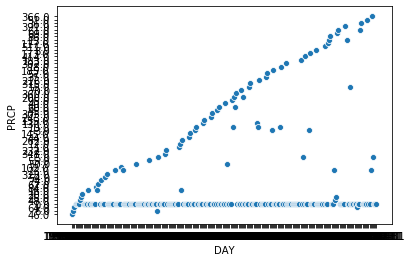

In [30]:
import seaborn as sns

ax = sns.scatterplot(x="DAY", y="PRCP",data=weather)

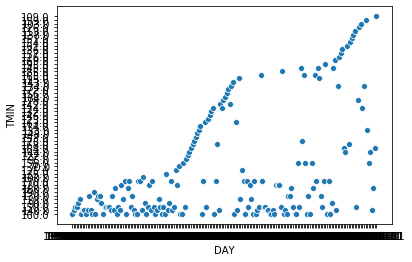

In [29]:
ax = sns.scatterplot(x="DAY", y="TMIN",data=weather)

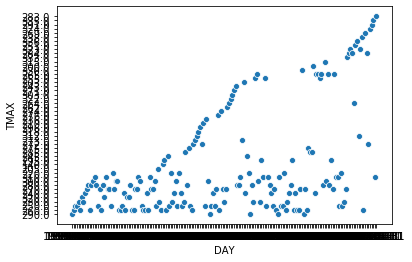

In [31]:
ax = sns.scatterplot(x="DAY", y="TMAX",data=weather)

In [32]:
weather_box=px.box(weather, x="PRCP", points='all', orientation='h')
weather_box.show()

In [33]:
weather_box=px.box(weather, x="TMIN", points='all', orientation='h')
weather_box.show()

In [34]:
weather_box=px.box(weather, x="TMAX", points='all', orientation='h')
weather_box.show()

In [35]:
weather_box=px.box(weather, x="DAY", points='all', orientation='h')
weather_box.show()